## What are the most demanded skills for Engineers?

**Methodoloy**

1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

### Import Libraries and Data

In [11]:
# Importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter Data for America

In [12]:
american_countries = [
    'United States', 'Canada', 'Mexico', 'Brazil', 'Argentina', 'Colombia',
    'Chile', 'Peru', 'Venezuela', 'Ecuador', 'Bolivia', 'Paraguay',
    'Uruguay', 'Guyana', 'Suriname', 'Panama', 'Costa Rica', 'Guatemala',
    'Honduras', 'Nicaragua', 'El Salvador', 'Belize', 'Cuba', 'Haiti',
    'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Bahamas'
]

df_america = df[df['job_country'].isin(american_countries)]

### Explode Skills

In [13]:
df_skills = df_america.explode('job_skills')
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
1,Data Analyst,r
1,Data Analyst,python
1,Data Analyst,sql
1,Data Analyst,nosql
...,...,...
785705,Expert Business Data Analyst - Now Hiring,tableau
785706,Junior Data Engineer,python
785706,Junior Data Engineer,sql
785706,Junior Data Engineer,azure


### Count Skills per Job Title

In [14]:
# Group by job_skills and job_title_short and count the number of occurences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1347,python,Data Scientist,49559
1673,sql,Data Analyst,40896
1674,sql,Data Engineer,37027
1675,sql,Data Scientist,36342
1346,python,Data Engineer,35322
...,...,...,...
486,electron,Cloud Engineer,1
490,electron,Machine Learning Engineer,1
65,arch,Cloud Engineer,1
1402,react.js,Machine Learning Engineer,1


### Create List of Engineering Roles

In [15]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = [title for title in job_titles if 'Engineer' in title][:]

job_titles

['Data Engineer',
 'Senior Data Engineer',
 'Software Engineer',
 'Machine Learning Engineer',
 'Cloud Engineer']

### Plot Skill Counts

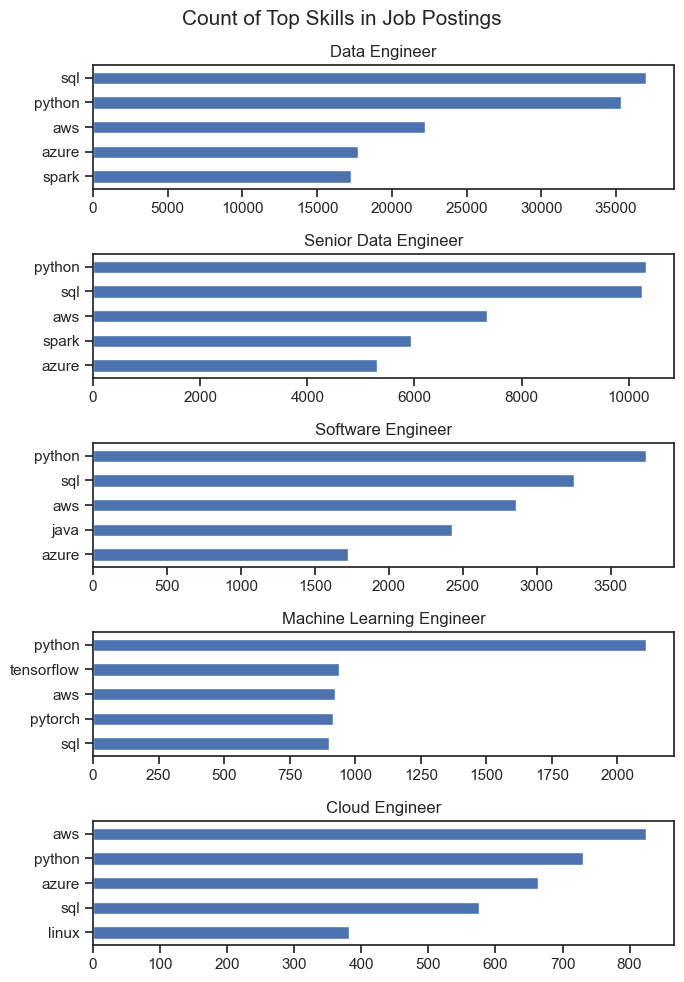

In [16]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(7, 10))

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Count of Top Skills in Job Postings', fontsize=15)
plt.tight_layout()
plt.show()

### Convert Counts to Percentages

In [17]:
df_job_title_count = df_america['job_title_short'].value_counts().reset_index(name='jobs_total')

In [18]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,49559,71221,69.584813
1,sql,Data Analyst,40896,81619,50.105980
2,sql,Data Engineer,37027,56288,65.781339
3,sql,Data Scientist,36342,71221,51.027085
4,python,Data Engineer,35322,56288,62.752274
...,...,...,...,...,...
2064,electron,Cloud Engineer,1,2802,0.035689
2065,electron,Machine Learning Engineer,1,3200,0.031250
2066,arch,Cloud Engineer,1,2802,0.035689
2067,react.js,Machine Learning Engineer,1,3200,0.031250


### Plot Percentage Count

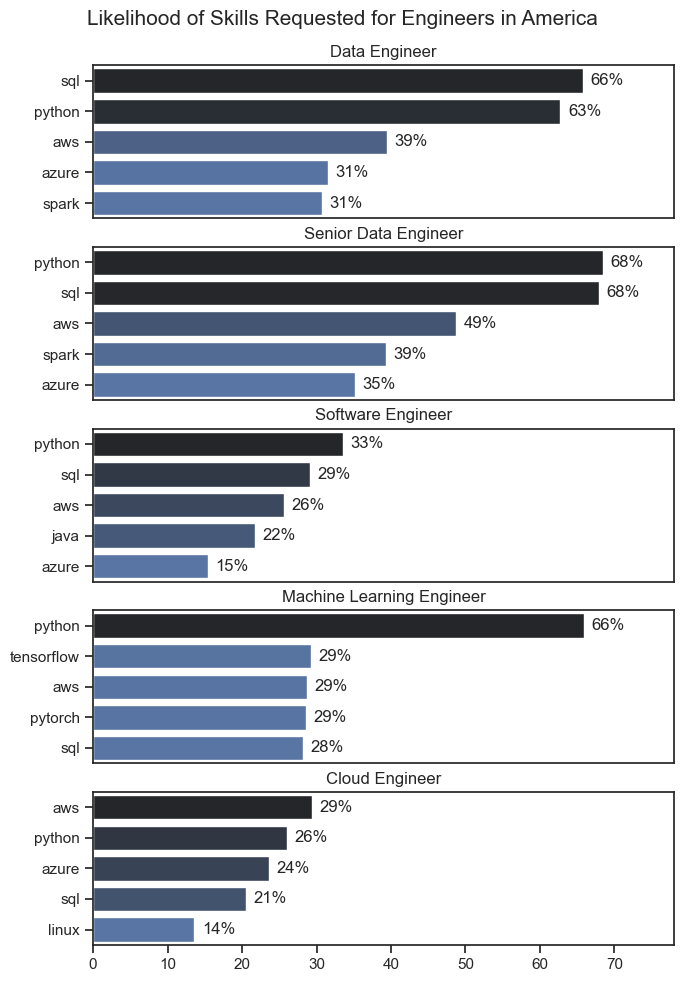

In [19]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(7, 10))

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    # df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested for Engineers in America', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()